In [90]:
'''2. Titanic Classification :
Make a system which tells whether the person will be save from sinking. What factors weremost likely lead to success-
socio-economic status, age, gender and more.
'''

'2. Titanic Classification :\nMake a system which tells whether the person will be save from sinking. What factors weremost likely lead to success-\nsocio-economic status, age, gender and more.\n'

import all the required libraries

In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
data = pd.read_csv('titanic_dataset.csv')

# Preprocess the data
# Select relevant features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
target = 'Survived'
data = data[features + [target]]



/var/folders/tv/6b2j88l558nbbq0p6m2kr1yh0000gn/T/ipykernel_28183/2085088128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


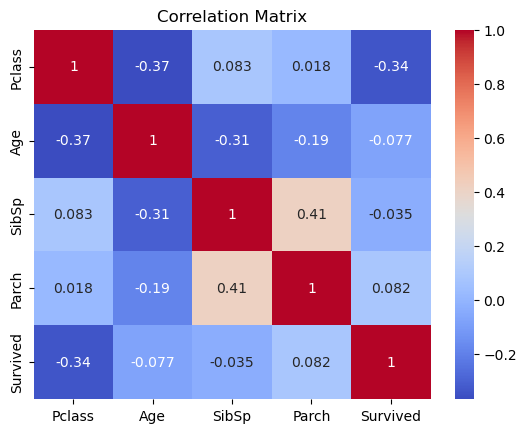

In [92]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [93]:
#Cleaning the data
#Checking for null values
data.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Survived      0
dtype: int64

In [94]:
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)

#Now all null values has been removed
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Survived    0
dtype: int64

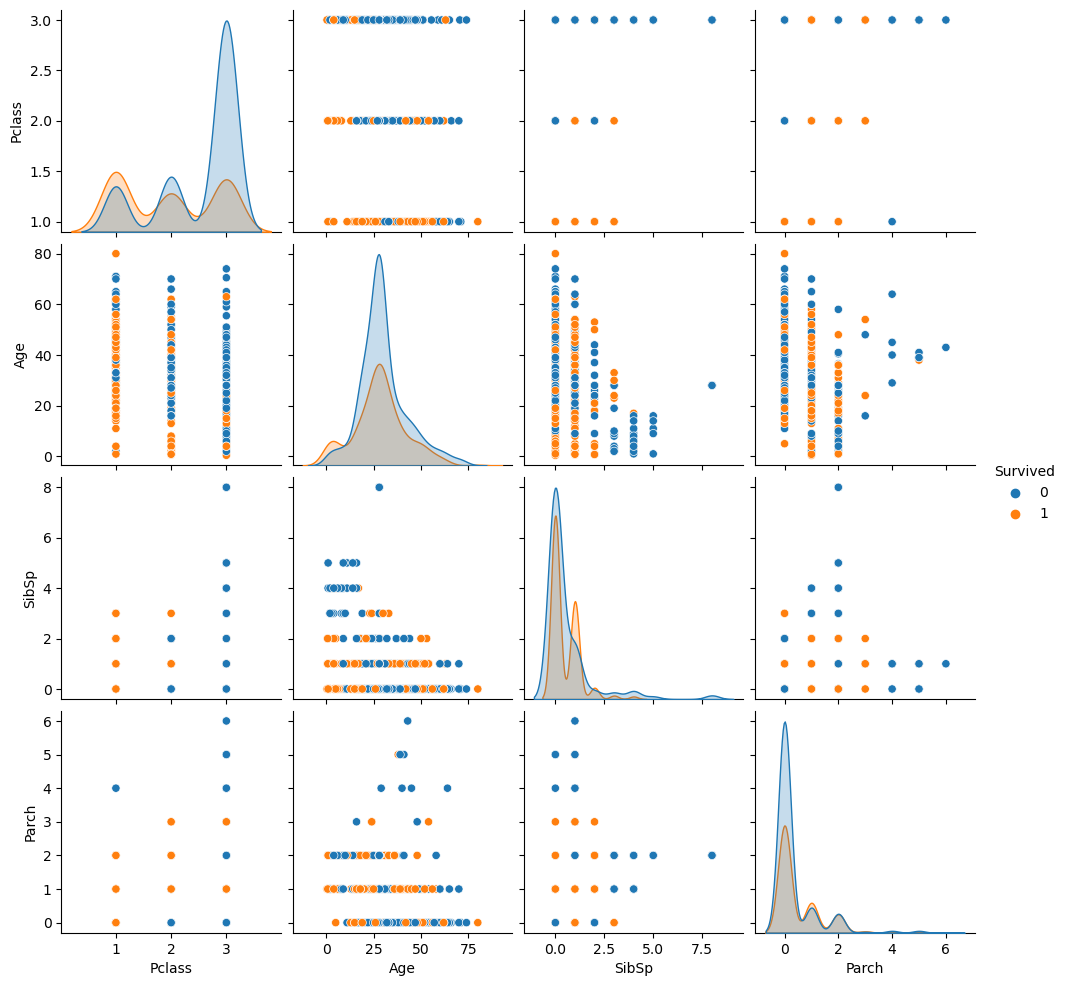

In [95]:
#Data Visualisation
sns.pairplot(data=data,hue='Survived')

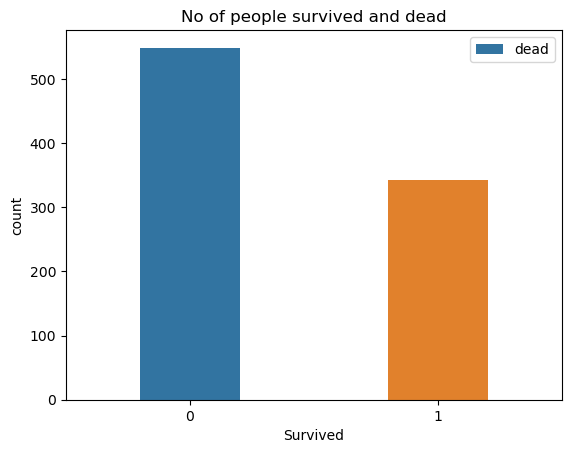

In [96]:
plt.title("No of people survived and dead")
sns.countplot(x='Survived',data=data,width=0.4)
plt.legend(['dead'],loc='upper right')
plt.show()

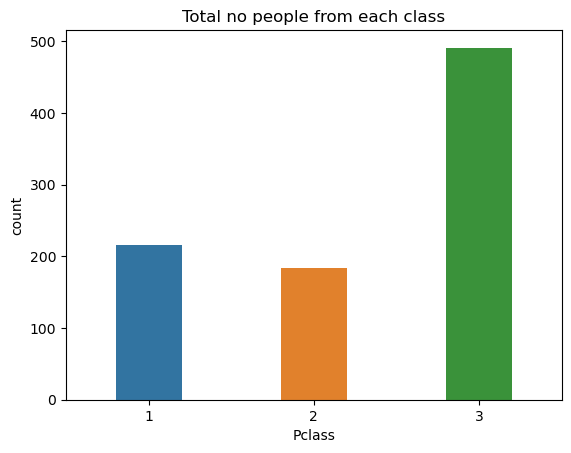

In [97]:
plt.title("Total no people from each class")
sns.countplot(x='Pclass',data=data,width=0.4)
plt.show()

In [98]:
# this shows most of the people belong to 3rd class

In [99]:
new_data = data.groupby(['Pclass'],as_index=False)['Survived'].sum()
new_data

,Pclass,Survived
0,1,136
1,2,87
2,3,119


<Axes: title={'center': 'No of people survived from each class'}, xlabel='Pclass', ylabel='Survived'>

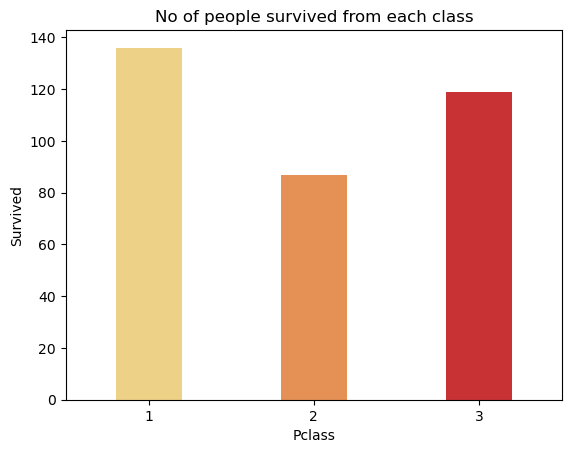

In [100]:

# no of people survived from each class
plt.title("No of people survived from each class")
sns.barplot(x=new_data['Pclass'],y=new_data['Survived'],data=new_data,palette='YlOrRd',width=0.4)

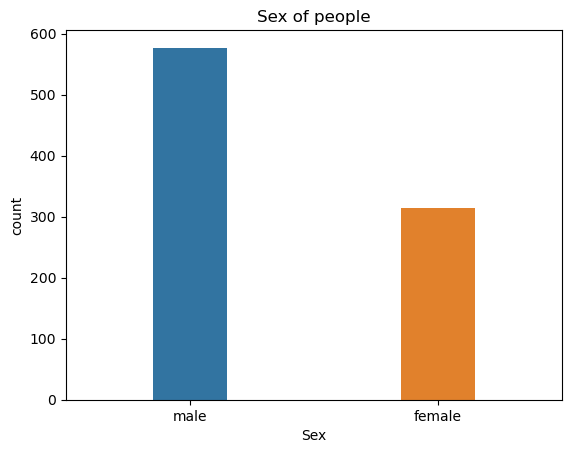

In [101]:
plt.title("Sex of people")
sns.countplot(x='Sex',data=data,width=0.3)
plt.show()

In [102]:
new_data = data.groupby(['Sex'])['Survived'].sum()
new_data


Sex
female    233
male      109
Name: Survived, dtype: int64

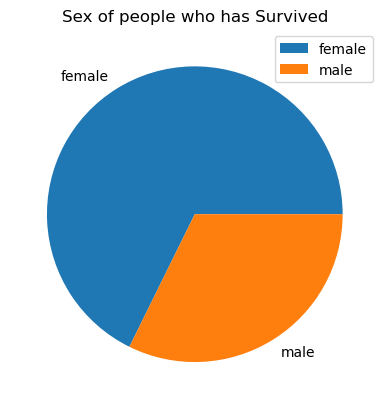

In [103]:
p=[195,93]
mylables = new_data.index
plt.title("Sex of people who has Survived")
plt.pie(p,labels=mylables)
plt.legend()
plt.show()


In [104]:


# Convert categorical variables to numerical labels
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])


In [105]:
# assigning x and y values
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
print("data:\n", data.head())
x.head()


data:
    Pclass  Sex   Age  SibSp  Parch  Survived
0       3    1  22.0      1      0         0
1       1    0  38.0      1      0         1
2       3    0  26.0      0      0         1
3       1    0  35.0      1      0         1
4       3    1  35.0      0      0         0


,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.0,1,0
1,1,0,38.0,1,0
2,3,0,26.0,0,0
3,1,0,35.0,1,0
4,3,1,35.0,0,0


In [106]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [107]:

# Split the data into training and testing sets
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

# RandomForest Classifier

In [108]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


# Preprocess the data to handle missing values
imputer = SimpleImputer(strategy='mean')  # Use mean strategy for imputation
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


Accuracy: 0.8097560975609757
Precision: 0.8082191780821918
Recall: 0.7023809523809523
F1 Score: 0.751592356687898
Confusion Matrix:
[[107  14]
 [ 25  59]]


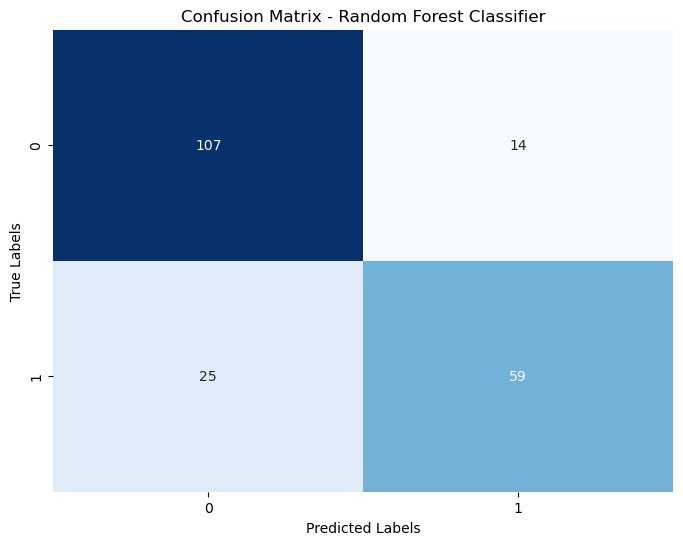

In [109]:
# Performance analysis of RFC
#Evaluation Metrics
accuracy = accuracy_score(y_test, rf_pred) 
precision = precision_score(y_test, rf_pred) 
recall = recall_score(y_test, rf_pred) 
f1 = f1_score(y_test, rf_pred) 
confusion_mat = confusion_matrix(y_test, rf_pred)

#Print evaluation metrics 
print(f"Accuracy: {accuracy}") 
print(f"Precision: {precision}") 
print(f"Recall: {recall}") 
print(f"F1 Score: {f1}") 
print(f"Confusion Matrix:\n{confusion_mat}")

#Confusion Matrix Heatmap 
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('Confusion Matrix - Random Forest Classifier') 
plt.show()

# Using sample input 


In [110]:
input_sample=(1,0,67,0,3)
input_sample=np.asarray(input_sample)
input_sample=input_sample.reshape(1,-1)
input_sample

array([[ 1,  0, 67,  0,  3]])

In [111]:
prediction=rf_model.predict(input_sample)

In [112]:
prediction

array([1])

In [113]:
if prediction[0]==0:
    print("The chances for person SINKING are high")
else:
    print("The chances for person NOT SINKING are high")

The chances for person NOT SINKING are high


# Logistic Regression Classifier

Accuracy: 0.8097560975609757
Precision: 0.7777777777777778
Recall: 0.75
F1 Score: 0.7636363636363638
Confusion Matrix:
[[103  18]
 [ 21  63]]


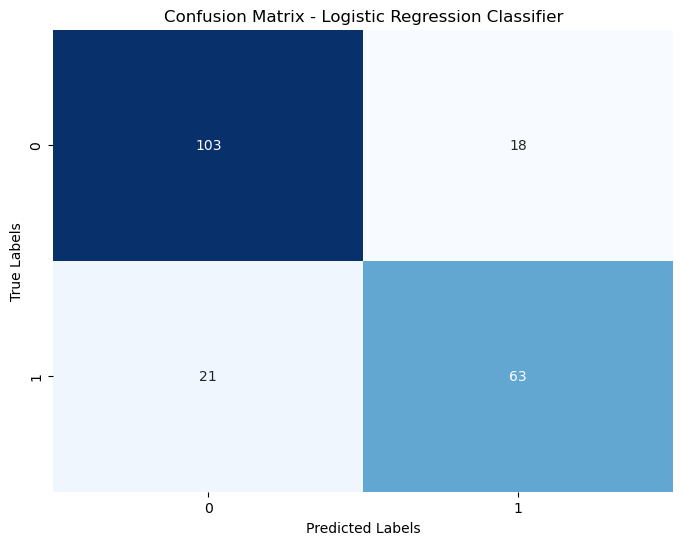

In [114]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)



# Evaluation Metrics
accuracy = accuracy_score(y_test, lr_pred)
precision = precision_score(y_test, lr_pred)
recall = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
confusion_mat = confusion_matrix(y_test, lr_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()


# Support Vector Machine Classifier

Accuracy: 0.6146341463414634
Precision: 0.8571428571428571
Recall: 0.07142857142857142
F1 Score: 0.13186813186813187
Confusion Matrix:
[[120   1]
 [ 78   6]]


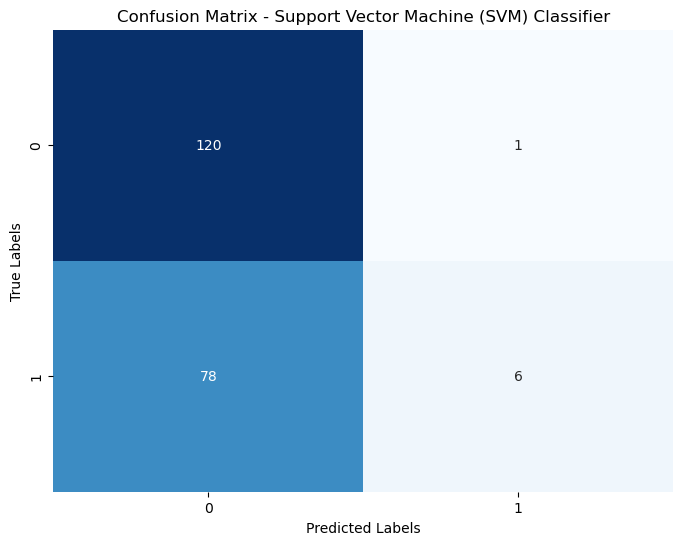

In [115]:
from sklearn.svm import SVC


# Support Vector Machine Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred, zero_division=0)
recall = recall_score(y_test, svm_pred)
f1 = f1_score(y_test, svm_pred)
confusion_mat = confusion_matrix(y_test, svm_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Support Vector Machine (SVM) Classifier')
plt.show()


#  K Nearest Neighbors Classifier

Accuracy: 0.8048780487804879
Precision: 0.8055555555555556
Recall: 0.6904761904761905
F1 Score: 0.7435897435897436
Confusion Matrix:
[[107  14]
 [ 26  58]]


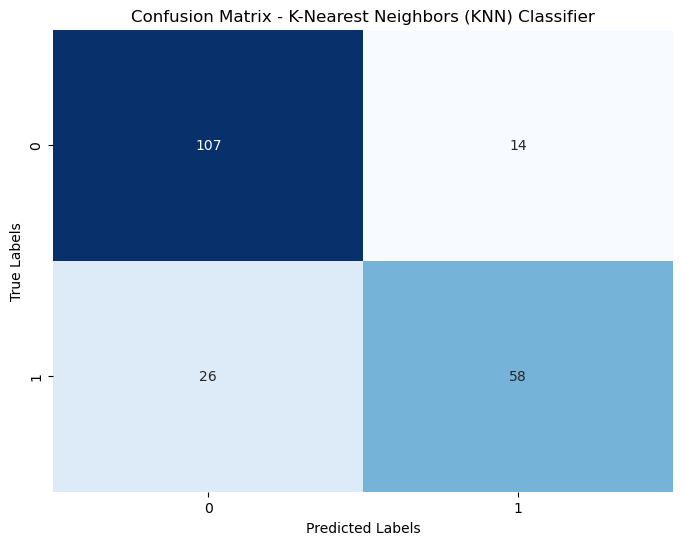

In [116]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)
confusion_mat = confusion_matrix(y_test, knn_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - K-Nearest Neighbors (KNN) Classifier')
plt.show()


# Decision Tree Classifier

Accuracy: 0.7560975609756098
Precision: 0.7125
Recall: 0.6785714285714286
F1 Score: 0.6951219512195121
Confusion Matrix:
[[98 23]
 [27 57]]


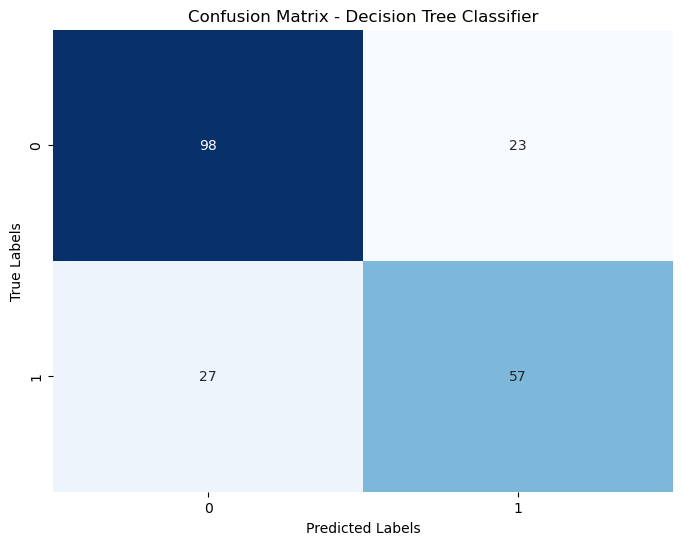

In [117]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
confusion_mat = confusion_matrix(y_test, dt_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


# AdaBoost Classifier

Accuracy: 0.8
Precision: 0.7721518987341772
Recall: 0.7261904761904762
F1 Score: 0.7484662576687117
Confusion Matrix:
[[103  18]
 [ 23  61]]


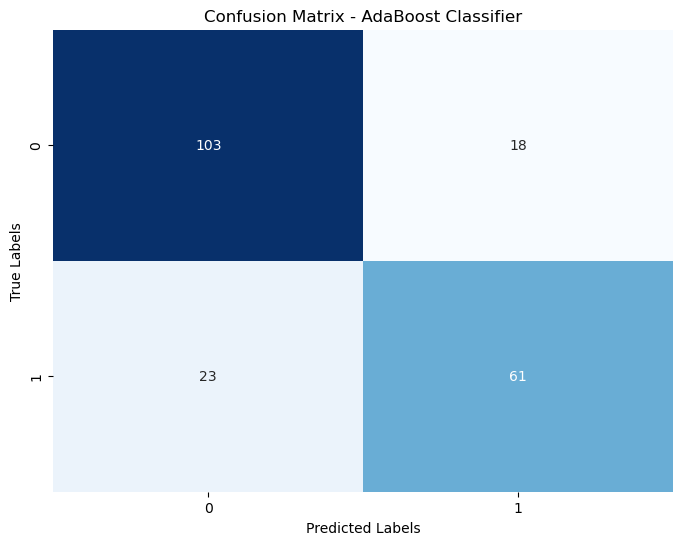

In [118]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoost Classifier
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, ada_pred)
precision = precision_score(y_test, ada_pred)
recall = recall_score(y_test, ada_pred)
f1 = f1_score(y_test, ada_pred)
confusion_mat = confusion_matrix(y_test, ada_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.show()

# Gradient Boosting Classifier

Accuracy: 0.824390243902439
Precision: 0.8428571428571429
Recall: 0.7023809523809523
F1 Score: 0.7662337662337663
Confusion Matrix:
[[110  11]
 [ 25  59]]


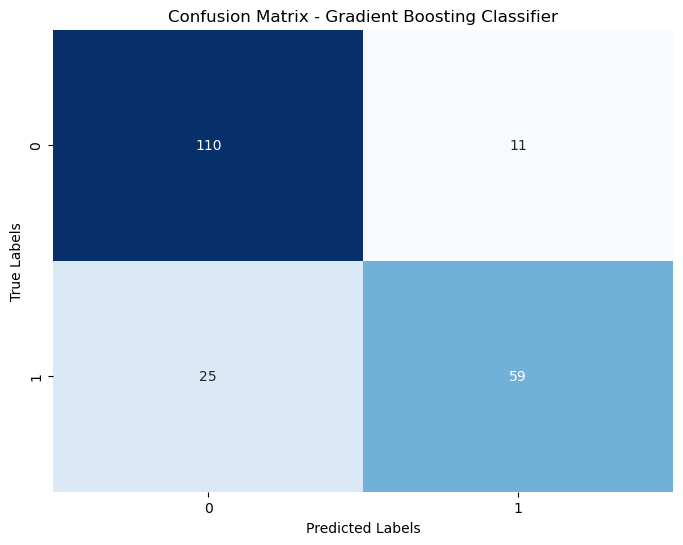

In [119]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred)
recall = recall_score(y_test, gb_pred)
f1 = f1_score(y_test, gb_pred)
confusion_mat = confusion_matrix(y_test, gb_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()


### Conclusion: Out of the algorithms (RFC, Logistic Regression, SVC, KNN, GradientBoosting and AdaBoost Algorithm) , Gradient Boosting algorithm performs better for the given task i.e, Titanic classification.